In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Generate Assorment Data

* Retail Price - (10-500, normal distibution)
* Cost Price - (random .3 - .7 of retail)
* Current Units OH - (random 10-500)
* Units Sold - (random 10-500)   


* Style # - random
* Style description - text (random combination of three words?)
* Weeks of Supply - calculated

In [2]:
retail_raw = scs.skewnorm.rvs(a=50, loc=20, scale=100, size=1000)

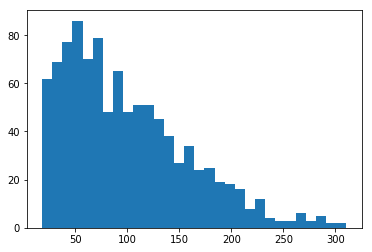

In [3]:
plt.hist(retail_raw, bins=30)
plt.show()

In [4]:
min(retail_raw)

17.80733700625684

In [5]:
retail = []
for item in retail_raw:
    retail.append(item // 1 + 0.99)

In [6]:
style_num = np.random.randint(100000000, 999999999, size=1000)

In [7]:
df = pd.DataFrame(retail, index=style_num)
df.reset_index(inplace=True)

In [8]:
df.columns = ["style_num", "retail"]

In [9]:
pcts = []
for i in range(1000):
#     pcts.append(random.uniform(0.3, 0.7))
    outlier_prob = random.random()
    if outlier_prob <= 0.01:
        pct = random.uniform(0.9, 0.95)
    elif outlier_prob <= 0.05:
        pct = random.uniform(0.7, 0.9)
    elif outlier_prob >= 0.95:
        pct = random.uniform(0.1, 0.3)
    elif outlier_prob >= 0.99:
        pct = random.uniform(0.05, 0.1)
    else:
        pct = random.uniform(0.3, 0.7)
    pcts.append(pct)
df["cost"] = round(df['retail'] * pcts, 2)

In [10]:
factors = []
for i in range(1000):
    factors.append(random.uniform(0.5, 1.5))
df["Units OH"] = round(1/df['retail'] * 1000 * factors)

In [11]:
factors = []
for i in range(1000):
    factors.append(random.normalvariate(0,1))
df['Month Units Sold'] = abs(round(df['Units OH'] * factors))

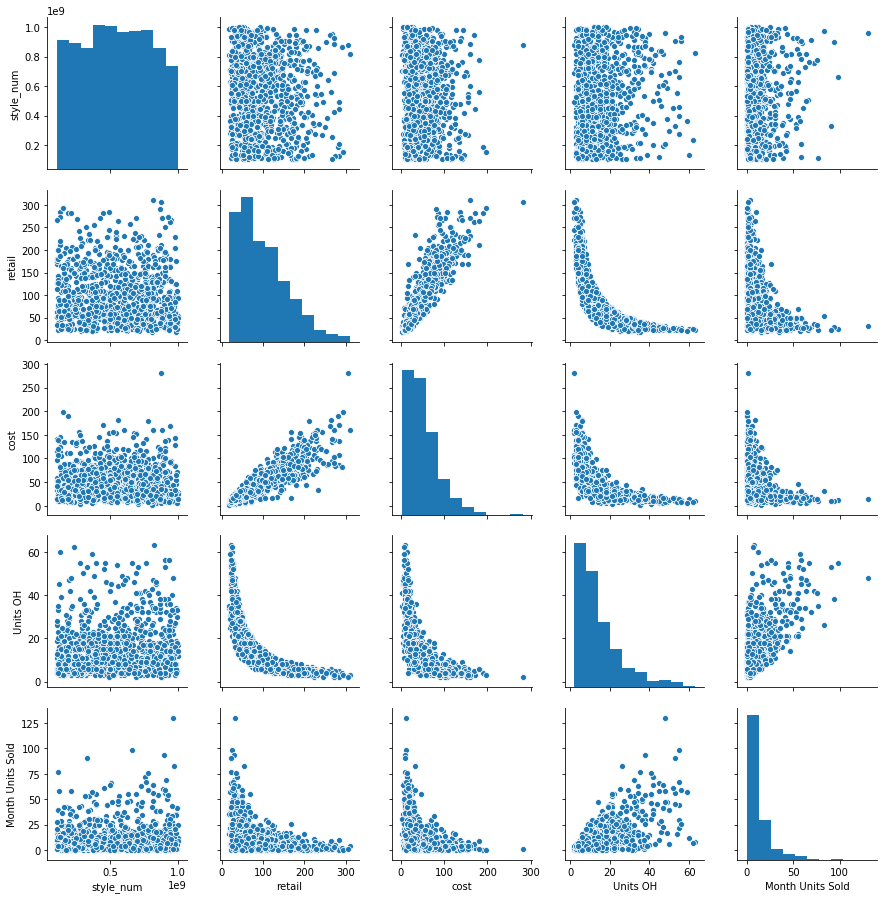

In [12]:
sns.pairplot(df)

In [13]:
gender = ['mens', 'womens', 'kids']
gender_prob = [0.25, 0.5, 0.25]
item_type = ['top', 'bottom', 'coat', 'shoes', 'accessories']
item_prob = [0.3, 0.3, 0.1, 0.1, 0.2]
desc = np.random.choice(gender, p=gender_prob)+" "+np.random.choice(item_type, p=item_prob)
descriptions = []
for i in range(1000):
    desc = np.random.choice(gender, p=gender_prob)+" "+np.random.choice(item_type, p=item_prob)
    descriptions.append(desc)
df['description'] = descriptions

In [14]:
wos = []
for i in range(1000):
    wos.append(random.randint(1,20))
df['weeks of supply'] = wos

In [17]:
df = df[['style_num', 'description', 'cost', 'retail', 'Units OH', 
        'Month Units Sold']]

In [18]:
df

,style_num,description,cost,retail,Units OH,Month Units Sold
0,273669462,mens top,46.95,72.99,12.0,10.0
1,129994559,mens shoes,13.60,23.99,60.0,12.0
2,417529867,womens bottom,20.36,49.99,20.0,10.0
3,130235189,mens accessories,112.84,128.99,10.0,9.0
4,655282234,womens top,20.34,50.99,16.0,18.0
5,609220979,womens shoes,57.26,128.99,6.0,6.0
6,628362503,mens accessories,54.05,77.99,16.0,15.0
7,557356344,womens bottom,62.78,127.99,5.0,1.0
8,963194679,womens coat,13.36,30.99,48.0,130.0
9,636205711,mens accessories,64.04,127.99,6.0,3.0


In [19]:
df.to_csv('../data/assortment_data_v2.csv', header=True, index=False)

In [25]:
def corr2cov(p: np.ndarray, s: np.ndarray) -> np.ndarray:
    """Covariance matrix from correlation & standard deviations"""
    d = np.diag(s)
    return d @ p @ d

In [33]:
# make units on hand correlated to retail price
corr = np.array([[1., 0.7],
                [0.7, 1.]])
retail_mean = df['retail'].mean()
retail_std = df['retail'].std()
mean = np.array([retail_mean, 30])
stdev = np.array([retail_std, 10])
cov = corr2cov(corr, stdev)

In [34]:
cov

array([[3811.65257658,  432.17007792],
       [ 432.17007792,  100.        ]])

In [35]:
unitsOH = np.random.multivariate_normal(mean=mean, cov=cov, size=1000)

In [39]:
unitsOH

array([[114.67498822,  32.6667852 ],
       [ 63.20358952,  21.8051814 ],
       [ 76.0736547 ,  18.67204425],
       ...,
       [167.87179991,  42.37067788],
       [139.23297831,  27.13623661],
       [ 90.15004039,  23.23177732]])

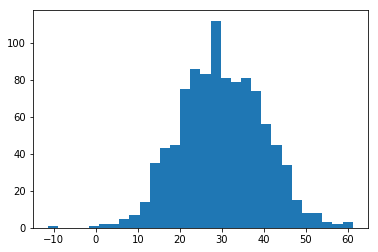

In [43]:
plt.hist(unitsOH[:,1], bins=30)
plt.show()

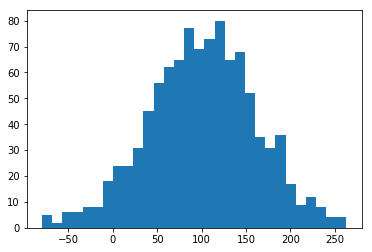

In [44]:
plt.hist(unitsOH[:,0], bins=30)
plt.show()